In [ ]:
from torchvision.models import vgg16
## Standard Library
## External Libraries
import numpy as np
import torch
import torch.nn as nn
from torchvision import transforms
from torch.autograd import Variable
import torch.nn.functional as functional
from torch.utils.data import Dataset, DataLoader
from skimage import io
import matplotlib.pyplot as plt
from torchvision.transforms import functional as F
import pandas as pd
import torch.utils.data as data
from PIL import Image
import scipy.io as sio
import h5py
from torchvision import datasets
import torchvision
from __future__ import print_function
import argparse
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import time
import torch.nn as nn
from torch.autograd import Function
import os
try:
    from google.colab import drive
    drive.mount('/content/gdrive')
except:
    print("Mounting Failed.")

Mounted at /content/gdrive


# DataLoader

In [ ]:
class Loader_validation(data.Dataset):
	def __init__(self, path, transform=None):
		self.path = path
		self.dataset = datasets.ImageFolder(path, transform=transform)
		self.length = self.dataset.__len__()
		self.transform = transform
		
	def __getitem__(self, idx):
		data, y_task = self.dataset.__getitem__(idx)
				
		return data, torch.tensor(y_task).long().squeeze()

	def __len__(self):
		return self.length

class Loader_unif_sampling3(data.Dataset):
	def __init__(self, path1, path2, path3, transform=None):
		self.path_1 = path1
		self.path_2 = path2
		self.path_3 = path3
		
		self.dataset_1 = datasets.ImageFolder(self.path_1, transform=transform)
		self.dataset_2 = datasets.ImageFolder(self.path_2, transform=transform)
		self.dataset_3 = datasets.ImageFolder(self.path_3, transform=transform)
		
		self.len_1 = self.dataset_1.__len__()
		self.len_2 = self.dataset_2.__len__()
		self.len_3 = self.dataset_3.__len__()
		
		self.length = np.max([self.len_1, self.len_2, self.len_3])
		
		self.transform = transform

	def __getitem__(self, idx):

		idx_1 = idx % self.len_1
		idx_2 = idx % self.len_2
		idx_3 = idx % self.len_3

		data_1, y_task_1 = self.dataset_1.__getitem__(idx_1)
		
		data_2, y_task_2 = self.dataset_2.__getitem__(idx_2)
		
		data_3, y_task_3 = self.dataset_3.__getitem__(idx_3)	
				
		return data_1,torch.tensor(y_task_1).long().squeeze(),data_2,torch.tensor(y_task_2).long().squeeze(),data_3,torch.tensor(y_task_3).long().squeeze()

	def __len__(self):
		return self.length
  
class Loader_unif_sampling2(data.Dataset):
	def __init__(self, path1, path2, transform=None):
		self.path_1 = path1
		self.path_2 = path2
		
		self.dataset_1 = datasets.ImageFolder(self.path_1, transform=transform)
		self.dataset_2 = datasets.ImageFolder(self.path_2, transform=transform)
		
		self.len_1 = self.dataset_1.__len__()
		self.len_2 = self.dataset_2.__len__()
		
		self.length = np.max([self.len_1, self.len_2])
		
		self.transform = transform

	def __getitem__(self, idx):

		idx_1 = idx % self.len_1
		idx_2 = idx % self.len_2

		data_1, y_task_1 = self.dataset_1.__getitem__(idx_1)
		
		data_2, y_task_2 = self.dataset_2.__getitem__(idx_2)
				
		return data_1, torch.tensor(y_task_1).long().squeeze(), data_2, torch.tensor(y_task_2).long().squeeze()

	def __len__(self):
		return self.length

In [ ]:
if __name__ == '__main__':

    source_4 = '/content/gdrive/MyDrive/CALTECH/full/'
    source_1 = '/content/gdrive/MyDrive/LABELME/full/'
    source_2 = '/content/gdrive/MyDrive/SUN/full/'
    source_3 = '/content/gdrive/MyDrive/PASCAL/full/'
    img_transform = transforms.Compose([transforms.RandomResizedCrop(227, scale=(0.0, 0.0)),transforms.ToTensor()])#, transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
    train_dataset4 = Loader_unif_sampling2(path1=source_1, path2=source_2, transform=img_transform)
    train_loader4 = torch.utils.data.DataLoader(dataset=train_dataset4, batch_size=16, shuffle=True, num_workers=0)
    train_dataset5 = Loader_unif_sampling2(path1=source_1, path2=source_3, transform=img_transform)
    train_loader5 = torch.utils.data.DataLoader(dataset=train_dataset5, batch_size=16, shuffle=True, num_workers=0)
    train_dataset6 = Loader_unif_sampling2(path1=source_2, path2=source_3, transform=img_transform)
    train_loader6 = torch.utils.data.DataLoader(dataset=train_dataset6, batch_size=16, shuffle=True, num_workers=0)
    train_dataset7 = Loader_unif_sampling3(path1=source_1, path2=source_2, path3=source_3, transform=img_transform)
    train_loader7 = torch.utils.data.DataLoader(dataset=train_dataset7, batch_size=16, shuffle=True, num_workers=0)
    # a, b, c, a_task, b_task, c_task = train_dataset7.__getitem__(2000)
    print("Done!")

Done!


In [ ]:
class Loader_validation(data.Dataset):
	def __init__(self, path, transform=None):
		self.path = path
		self.dataset = datasets.ImageFolder(path, transform=transform)
		self.length = self.dataset.__len__()
		self.transform = transform
		
	def __getitem__(self, idx):
		data, y_task = self.dataset.__getitem__(idx)
				
		return data, torch.tensor(y_task).long().squeeze()

	def __len__(self):
		return self.length

class Loader_test_sampling1(data.Dataset):
	def __init__(self, path, transform=None):
		self.path = path
		
		self.dataset = datasets.ImageFolder(self.path, transform=transform)
		
		self.length = self.dataset.__len__()
		
		self.transform = transform

	def __getitem__(self, idx):

		data, y_task = self.dataset.__getitem__(idx)
				
		return data, torch.tensor(y_task).long().squeeze()

	def __len__(self):
		return self.length

In [ ]:
if __name__ == '__main__':

    source_4 = '/content/gdrive/MyDrive/CALTECH/full/'
    source_1 = '/content/gdrive/MyDrive/LABELME/full/'
    source_2 = '/content/gdrive/MyDrive/SUN/full/'
    source_3 = '/content/gdrive/MyDrive/PASCAL/full/'
    img_transform = transforms.Compose([transforms.RandomResizedCrop(227, scale=(0.0, 0.0)), transforms.ToTensor()])#, transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
    train_dataset1 = Loader_test_sampling1(path=source_1, transform=img_transform)
    train_loader1 = torch.utils.data.DataLoader(dataset=train_dataset1, batch_size=32, shuffle=True, num_workers=0)
    train_dataset2 = Loader_test_sampling1(path=source_2, transform=img_transform)
    train_loader2 = torch.utils.data.DataLoader(dataset=train_dataset2, batch_size=32, shuffle=True, num_workers=0)
    train_dataset3 = Loader_test_sampling1(path=source_3, transform=img_transform)
    train_loader3 = torch.utils.data.DataLoader(dataset=train_dataset3, batch_size=32, shuffle=True, num_workers=0)
    test_dataset = Loader_validation(path=source_4, transform=img_transform)
    test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=32, shuffle=True, num_workers=0)
    a, a_task = train_dataset1.__getitem__(20)	
    b, b_task = train_dataset2.__getitem__(20)
    c, c_task = train_dataset3.__getitem__(20)
    print(a.size(), a_task)
    print(b.size(), b_task)
    print(c.size(), c_task)

torch.Size([3, 227, 227]) tensor(0)
torch.Size([3, 227, 227]) tensor(1)
torch.Size([3, 227, 227]) tensor(0)


# DANN

In [ ]:
#Pretrained model
#model_Dann=torch.load("/content/gdrive/MyDrive/model_pre_trained.pth")
model_Dann=torch.load("/content/gdrive/MyDrive/model_71.pth")

In [ ]:
import tensorwatch as tw

In [ ]:
class GRL(Function):
    @staticmethod
    def forward(ctx, x, constant):
        ctx.constant = constant
        return x.view_as(x) * constant
    @staticmethod
    def backward(ctx, grad_output):
        return grad_output.neg() * ctx.constant, None

In [ ]:
class Dann(nn.Module):
    def __init__(self):
        super(Dann, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
            nn.ReLU(inplace=True)
    ,nn.Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    ,nn.ReLU(inplace=True)
    ,nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    ,nn.Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    ,nn.ReLU(inplace=True)
    ,nn.Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    ,nn.ReLU(inplace=True)
    ,nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    ,nn.Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    ,nn.ReLU(inplace=True)
    ,nn.Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    ,nn.ReLU(inplace=True)
    ,nn.Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    ,nn.ReLU(inplace=True)
    ,nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    ,nn.Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    ,nn.ReLU(inplace=True)
    ,nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    ,nn.ReLU(inplace=True)
    ,nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    ,nn.ReLU(inplace=True)
    ,nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    ,nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    ,nn.ReLU(inplace=True)
    ,nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    ,nn.ReLU(inplace=True)
    ,nn.Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    ,nn.ReLU(inplace=True)
    ,nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        )

        self.avgpool = nn.AdaptiveAvgPool2d(output_size=(7, 7))
        self.classifier = nn.Sequential(
            nn. Linear(in_features=25088, out_features=4096, bias=True),
            nn.ReLU(inplace=True),nn.Dropout(p=0.5, inplace=False)
    ,nn.Linear(in_features=4096, out_features=4096, bias=True)
    ,nn.ReLU(inplace=True)
    ,nn.Dropout(p=0.5, inplace=False)
    ,nn.Linear(in_features=4096, out_features=5, bias=True)
        )

        self.dc = nn.Sequential(
            nn.Linear(25088, 1000),
            nn.Linear(1000, 100),
            nn.BatchNorm1d(100),
            nn.ReLU(),
            nn.Linear(100, 3),
        )
    def forward(self, x,alpha):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        y = GRL.apply(x, alpha)
        x = self.classifier(x)
        y = self.dc(y)
        x=x.view(x.shape[0],-1)
        y=y.view(y.shape[0],-1)
        return x, y

In [ ]:
model = Dann().cuda()
for i in range(len(model.features)):
  # print(layer)
  model.features[i]=model_Dann.features[i]
  for param in model.features[i].parameters():
       param.require_grad = True

model.avgpool=model_Dann.avgpool
for param in model.avgpool.parameters():
    param.require_grad = False
for i in range(len(model.classifier[:-1])):
    model.classifier[i]=model_Dann.classifier[i]
    for param in model.classifier[i].parameters():
        param.require_grad = False

In [ ]:
optimizer = optim.SGD(model.parameters(), lr= 0.01)
#optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)
criterion = nn.CrossEntropyLoss()

def optimizer_scheduler(optimizer, p):
    for param_group in optimizer.param_groups:
        param_group['lr'] = 0.01 / (1. + 10 * p) ** 0.75
    return optimizer

In [ ]:
allepoch=50
current_accuracy=0.67
loss_label=[]
loss_domain=[]
model=model.cuda()
for epoch in range(allepoch):
    #len_dataloader = min(len(source_train), len(target_train))
    total_steps = allepoch * 96
    i = 0
    model.train()
    for i,(inputs1, labels1, inputs2, labels2, inputs3, labels3) in enumerate(train_loader7):
        start_time = time.time()
        inputs_test=torch.cat((inputs1,inputs2,inputs3),0)
        #print(labels1.size())
        #print(labels2.size())
        labels_test=torch.cat((labels1,labels2,labels3),0)
        if torch.cuda.is_available():
            inputs, labels = inputs_test.cuda(), labels_test.cuda()
            #inputs = inputs.cuda()
        #s_img, s_label = data_source

        start_steps = epoch * 96

        p = float(i + start_steps) / total_steps
        alpha = 2. / (1. + np.exp(-10 * p)) - 1

        optimizer = optimizer_scheduler(optimizer, p)
        optimizer.zero_grad()


        batch_size = labels1.size(0)

        domain_label1 = torch.zeros(batch_size)
        domain_label1 = domain_label1.long()


        a,b = model(inputs,alpha)
        #print(a.size())
        err_s_label = criterion(a, labels)
        _,b=model(inputs1.cuda(),alpha)
        err_s_domain1 = criterion(b, domain_label1.cuda())

        # training model using target data
        #t_img, _ = data_target

        batch_size = labels2.size(0)

        domain_label2 = torch.ones(batch_size)
        domain_label2 = domain_label2.long()



        _, b = model(inputs2.cuda(),alpha)
        err_s_domain2 = criterion(b, domain_label2.cuda())

        batch_size = labels3.size(0)

        domain_label3 = 2*torch.ones(batch_size)
        domain_label3 = domain_label3.long()



        _, b = model(inputs3.cuda(),alpha)
        err_s_domain3 = criterion(b, domain_label3.cuda())
        err_domain=err_s_domain1 + err_s_domain2+err_s_domain3
        beta=0.2
        if err_domain>6:
          beta=0.2**(err_domain)
        if err_domain>8:
          beta=0
        if err_domain>25:
           for i1 in range(len(model.dc)):
             for param in model.dc[i1].parameters():
                param.require_grad = False 
        if err_domain<5:
           for i2 in range(len(model.dc)):
             for param in model.dc[i2].parameters():
                param.require_grad = True 
        err = err_s_label - beta*err_domain
        err.backward()
        optimizer.step()


        if(i % 10 == 0):
            print('epoch:{},[{}/{}],loss_label:{:.3f},loss_domain:{:.3f},time{}'.
                      format(epoch, i,100, float(err_s_label), float(err_s_domain1 + err_s_domain2),
                              time.time() - start_time))
        #if(i%100==0):
            #loss_label.append(err_s_label.cpu().item())
            #loss_domain.append(err_domain.cpu().item())

        i += 1
    test_accuracy=0
    T=0
    L1=0
    L2=0
    for i,(inputs1, labels1, inputs2, labels2, inputs3, labels3) in enumerate(train_loader7):
        start_time = time.time()
        inputs_test=torch.cat((inputs1,inputs2,inputs3),0)
        #print(labels1.size())
        #print(labels2.size())
        labels_test=torch.cat((labels1,labels2,labels3),0)
        if torch.cuda.is_available():
            inputs, labels = inputs_test.cuda(), labels_test.cuda()
        batch_size = labels.size(0)

        domain_label1 = torch.zeros(batch_size)
        domain_label1 = domain_label1.long()
        a,b = model(inputs,alpha)
        err_s_label = criterion(a, labels)
        #_,b=model(inputs1.cuda(),alpha)
        err_s_domain1 = criterion(b, domain_label1.cuda())
        L1+=err_s_label.cpu().item()
        L2+=err_s_domain1.cpu().item()
        T+=1
    loss_label.append(L1/T)
    loss_domain.append(L2/T)

In [ ]:
for i, (test_inputs, test_labels) in enumerate(test_loader):
        if torch.cuda.is_available():
            test_inputs, test_labels = test_inputs.cuda(), test_labels.cuda()
            test_inputs = test_inputs.repeat(1, 1, 1, 1).cuda()
        test_output,_ = model(test_inputs,alpha)
        _, test_output = torch.max(test_output, 1)
        test_accuracy += torch.sum(test_output == test_labels)
test_accuracy = test_accuracy / len(test_loader.dataset)
test_accuracies7.append(test_accuracy)
print("Test accuracy: ", test_accuracy.item())

Test accuracy:  0.9731224179267883


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


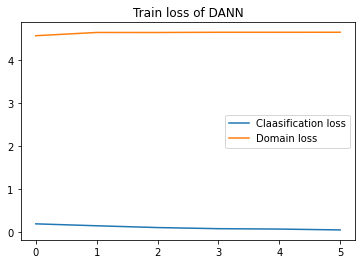

In [ ]:
plt.plot(loss_label,label='Claasification loss')
plt.plot(loss_domain,label='Domain loss')
plt.legend()
plt.title('Train loss of DANN')
plt.savefig('Train_loss_epoch.eps')